# The Problem
A Taiwan-based credit card issuer wants to better predict the likelihood of default for its customers, as well as identify the key drivers that determine this likelihood. This would inform the issuer’s decisions on who to give a credit card to and what credit limit to provide. It would also help the issuer have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted credit products to their customers.

Data source
Data source: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset.

We acknowledge the following: Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The credit card issuer has gathered information on 30000 customers. The dataset contains information on 24 variables, including demographic factors, credit data, history of payment, and bill statements of credit card customers from April 2005 to September 2005, as well as information on the outcome: did the customer default or not?

# Data Description

. ID: ID of each client

    .LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    .SEX: Gender (1=male, 2=female)
    .EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    .MARRIAGE: Marital status (1=married, 2=single, 3=others)
    .AGE: Age in years
    .PAY_0: Repayment status in September, 2005 (-2=No payment balance,-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
    .PAY_2: Repayment status in August, 2005 (scale same as above)
    .PAY_3: Repayment status in July, 2005 (scale same as above)
    .PAY_4: Repayment status in June, 2005 (scale same as above)
    .PAY_5: Repayment status in May, 2005 (scale same as above)
    .PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    .BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    .BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    .BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    .BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    .BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    .PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    .PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    .PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    .PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    .PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    .PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    .default.payment.next.month: Default payment (1=yes, 0=no)

# Import Libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
import pandas as pd

from sklearn import metrics
pd.set_option('display.max_columns', 100)

In [2]:
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False
data_df = pd.read_csv(r"F:\Datasets\end_to_end_data_sets\end to end data sets\Credit Default.csv")

In [3]:
print("Default Credit Card Clients data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Default Credit Card Clients data -  rows: 30000  columns: 25


In [4]:
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
data_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


There are 30,000 distinct credit card clients.

The average value for the amount of credit card limit is 167,484. The standard deviation is unusually large, max value being 1M.

Education level is mostly graduate school and university.
Most of the clients are either married or single (less frequent the other status).
Average age is 35.5 years, with a standard deviation of 9.2.
As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,default.payment.next.month,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,PAY_AMT6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Is this enough proof we don't have missing data?
Many times, yes! this is enough proof but it is more common than we think to have unexpected null values or camouflaged nulls i.e, nulls represented by 0s or someother character or words. So it is often a good idea to check for those using value_counts() 

# Check missing data
Let's check if there is any missing data.

In [8]:
for col in data_df.columns:
    print(col+':\n\n',pd.value_counts(data_df[col]),'\n\n\n')

ID:

 2047     1
1322     1
15629    1
9486     1
11535    1
        ..
17053    1
23198    1
21151    1
10928    1
2049     1
Name: ID, Length: 30000, dtype: int64 



LIMIT_BAL:

 50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
             ... 
780000.0        2
690000.0        1
1000000.0       1
760000.0        1
327680.0        1
Name: LIMIT_BAL, Length: 81, dtype: int64 



SEX:

 2    18112
1    11888
Name: SEX, dtype: int64 



EDUCATION:

 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64 



MARRIAGE:

 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64 



AGE:

 29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466


# Data Imbalance
Let's check data unbalance with respect with target value, i.e. default.payment.next.month.

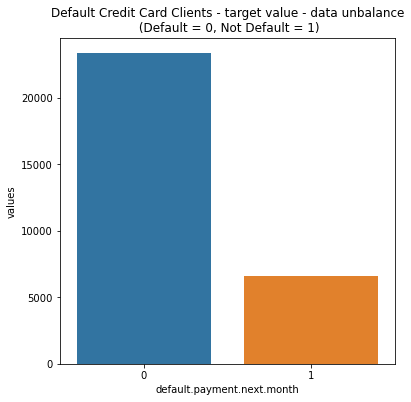

In [9]:
temp = data_df["default.payment.next.month"].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

A number of 6,636 out of 30,000 (or 22%) of clients will default next month as per our data. The data has a considerable imbalance with respect of the target value (default.payment.next.month)

# Data exploration

Marriage status meaning is:

    0 : unknown (let's consider as others as well)
    
    1 : married
    2 : single
    3 : others
    

Sex meaning is:

    1 : male
    2 : female

From our prior analysis with value_counts, what changes should we perform in Eduction and Marriage fields?
We can replace 0s with 3, 5 or 6 in Marriage and Education respectively. We will perform this operation after saving the original data in another dataframe
    Now we only have the Levels we know

In [10]:
data_df_org = data_df.copy(deep=True)
id(data_df_org) == id(data_df)

False

In [11]:
data_df['SEX'].replace({1:'male',2:'female'},inplace=True)
data_df['MARRIAGE'].replace({1:'married', 2:'single', 3:'others', 0:'others'},inplace=True)
data_df['EDUCATION'].replace({1:'graduate school', 2:'university', 3:'high school', 4:'others', 5:'unknown', 6:'unknown',0:'unknown'},inplace=True)
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,female,university,married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [12]:
for col in ['MARRIAGE','EDUCATION']:
    print(col+':\n\n',data_df[col].value_counts(),'\n\n\n')

MARRIAGE:

 single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64 



EDUCATION:

 university         14030
graduate school    10585
high school         4917
unknown              345
others               123
Name: EDUCATION, dtype: int64 





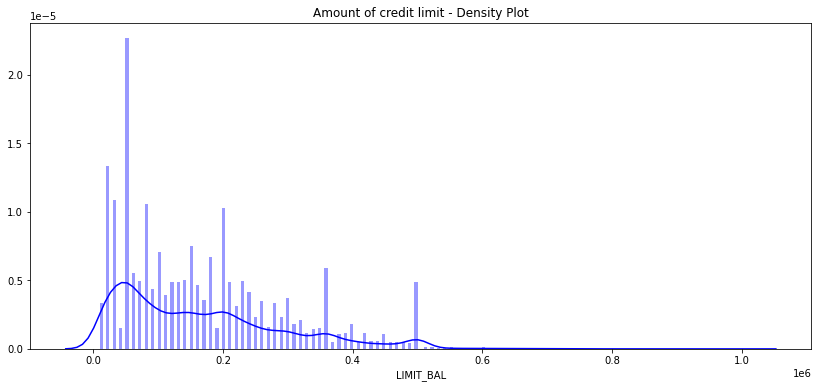

In [13]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(data_df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

Most common credit limit is 50k given each bar represents 10k more then previous one let's zoom in till 0.6*10^6 for a clearer view

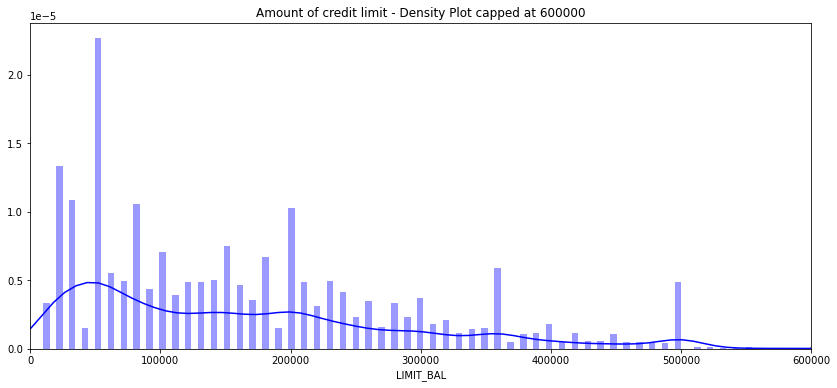

In [14]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot capped at 600000')
sns.set_color_codes("pastel")
sns.distplot(data_df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.xlim((0,600000))
plt.show()

This is still a skewed plot even after being capped at 600000

In [15]:
data_df['LIMIT_BAL'].value_counts().shape

(81,)

In [16]:
data_df['LIMIT_BAL'].value_counts().head(5)

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64

Indeed, the largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

Let's visualize the density plot for amount of credit limit (LIMIT_BAL), grouped by default payment next month.

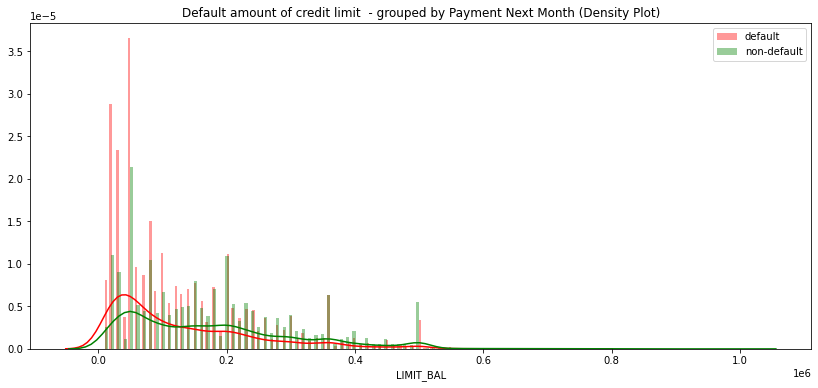

In [17]:
class_0 = data_df.loc[data_df['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = data_df.loc[data_df['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red", label='default')
sns.distplot(class_0,kde=True,bins=200, color="green", label='non-default')
plt.legend()
plt.show()

Most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults). Largest number of defaults are for the amounts of 50,000, 20,000 and 30,000. Once again let's cap at 600000 for clearer view

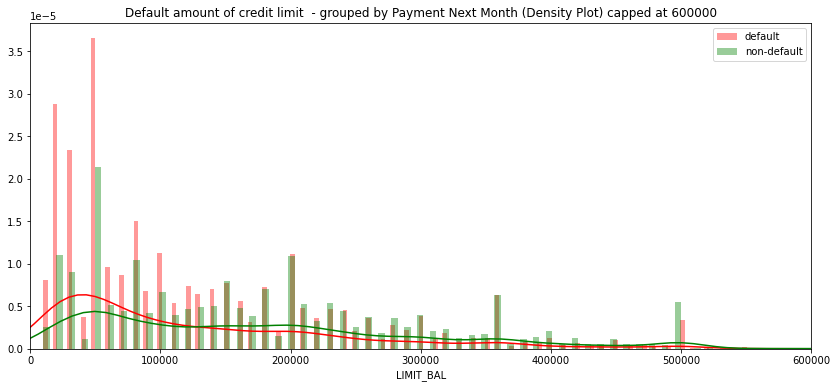

In [18]:
class_0 = data_df.loc[data_df['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = data_df.loc[data_df['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot) capped at 600000')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red", label='default')
sns.distplot(class_0,kde=True,bins=200, color="green", label='non-default')
plt.xlim((0,600000))
plt.legend()
plt.show()

# Credit limit vs. sex
Let's check the credit limit distribution vs. sex. For the sex, 1 stands for male and 2 for female.

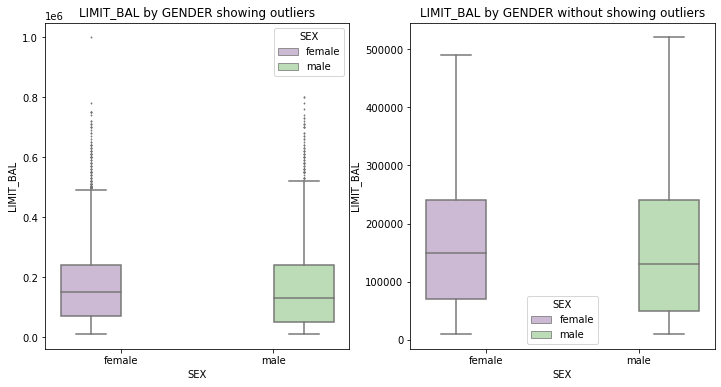

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=data_df, palette="PRGn",showfliers=True,fliersize=1)
ax1.title.set_text('LIMIT_BAL by GENDER showing outliers')
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=data_df, palette="PRGn",showfliers=False)
ax2.title.set_text('LIMIT_BAL by GENDER without showing outliers')
plt.show();

The limit credit amount is quite balanced between sexes. The males have a slightly smaller Q2 and larger Q3 and Q4 and a lower mean. The female have a larger outlier max value (1M NT dollars).

# Features correlation
For the numeric values, let's represent the features correlation.
Let's check the correlation of Amount of bill statement in April - September 2005.

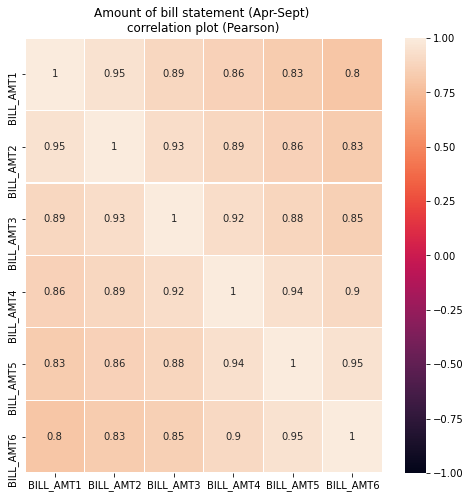

In [20]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1,annot = True)
plt.show()

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.
Let's check the correlation of Amount of previous payment in April - September 2005.

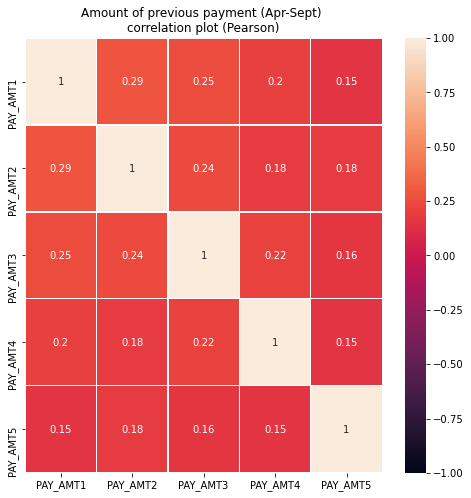

In [21]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, annot = True)
plt.show()


There are no correlations between amounts of previous payments for April-Sept 2005.
Let's check the correlation between Repayment status in April - September 2005.

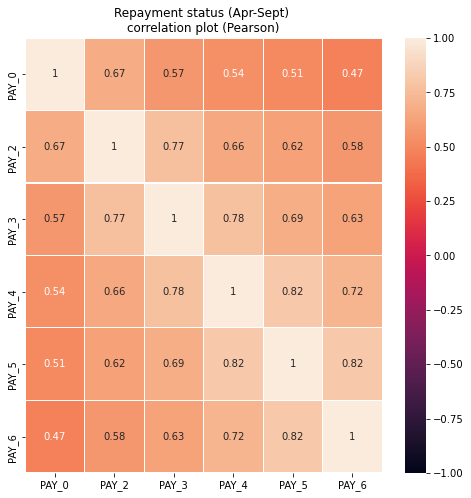

In [22]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1,annot=True)
plt.show()

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.

# Sex, Education, Age and Marriage
Let's show sex, education, age and marriage distributions.
We start by showing the boxplots with age distribution grouped by marriage status and sex.

In [23]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=data_df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels())
    plt.show();

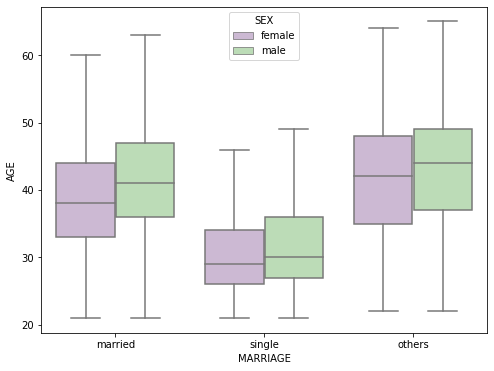

In [24]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

It looks like Married status others, with mean values over 40 and Q4 values over 60 could mean things like but not limited to widow or widower or divorced while Married status 0 could be not specified or divorced, as Q1 values are above values for married of both sexes.


Married males have mean age above married women. Unmarried males have mean value for age above unmarried women as well but closer. Q3 and Q4 values for married men are above corresponding values for married women.


Let's show the boxplots with age distribution grouped by education and marriage.

In [25]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=data_df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels())
    ax1.title.set_text('{} split by {} shown with {}'.format(feature1,feature3,feature2))
    plt.show();

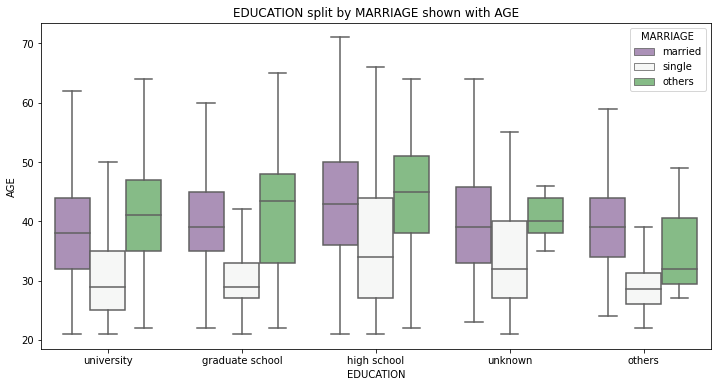

In [26]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)


# Age, sex and credit amount limit
Let's show the boxplots with credit amount limit distribution grouped by age and sex.

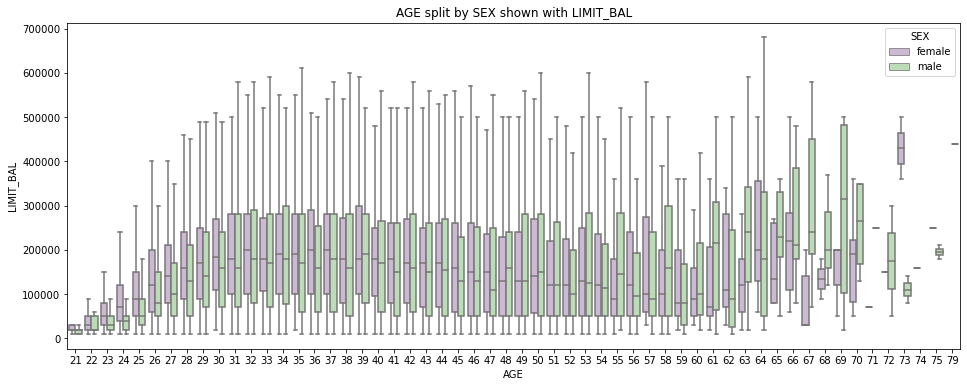

In [27]:
boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)


Mean, Q3 and Q4 values are increasing for both male and female with age until around 35 years and then they are oscilating and get to a maximum of Q4 for males at age 64.

Mean values are generally smaller for males than for females, with few exceptions, for example at age 39, 48, until approximately 60, where mean values for males are generally larger than for females.

It is generally not a good idea to make box-plots for too many values unless the plot is clearly readable

# Marriage status, education level and credit amount limit
Let's show the boxplots with credit amount limit distribution grouped by marriage status and education level.

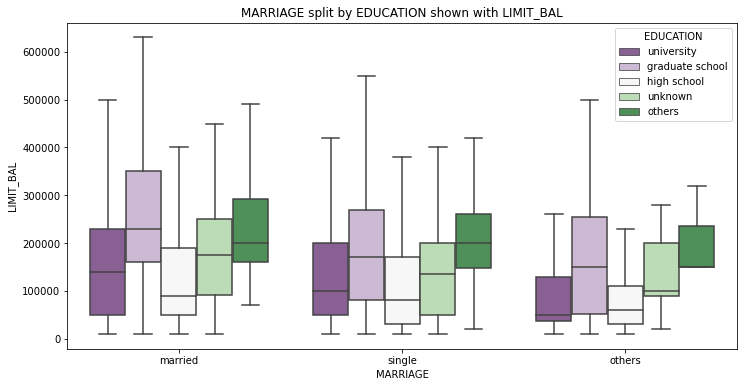

In [28]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)


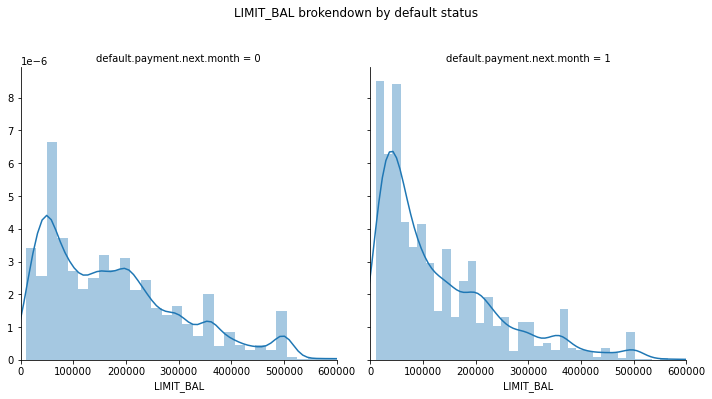

In [29]:
fg = sns.FacetGrid(data_df,col='default.payment.next.month',height = 5, aspect =1,xlim=(0,600000))
fg = fg.map(sns.distplot,'LIMIT_BAL')
plt.suptitle('LIMIT_BAL brokendown by default status',y=1.1)
plt.show()

Looks like people who are likely to default have higher limit_bal than the ones that pay. Let's look at the data for payment defaulters

In [30]:
defaulters = data_df[data_df['default.payment.next.month']==1]
non_default = data_df[data_df['default.payment.next.month']==0]
defaulters['default.payment.next.month'].value_counts()

1    6636
Name: default.payment.next.month, dtype: int64

In [31]:
defaulters.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

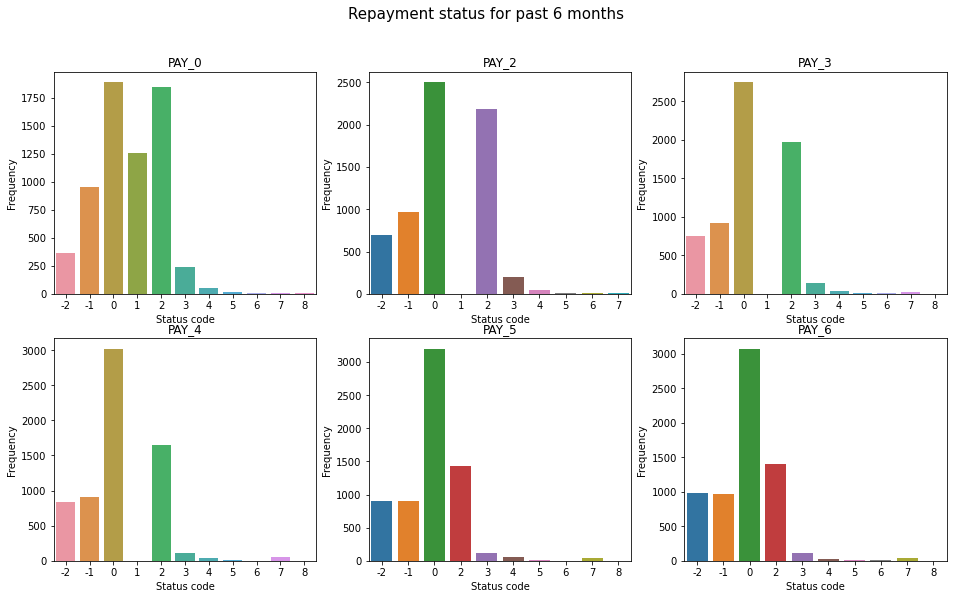

In [32]:
pays = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(16,9))
axs = axs.flatten()
plt.suptitle('Repayment status for past 6 months',fontsize=15)
for ax,ind in zip(axs,range(len(pays))):
    vc = pd.value_counts(defaulters[pays[ind]])
    sns.barplot(x=vc.index,y=vc.values,ax=ax)
    ax.set_title(pays[ind])
    ax.set_xlabel('Status code')
    ax.set_ylabel('Frequency')

We need to understand considerable number of people don't even have any balance dues for Aug, Jul, Jun, May, Apr and from the graphs it looks like that number is consistent across these months

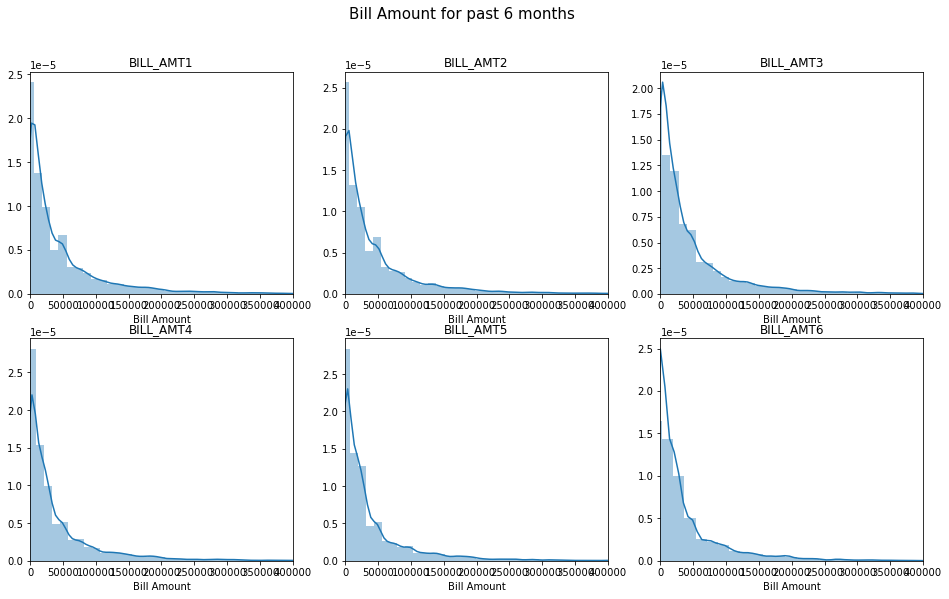

In [33]:
bills = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(16,9))
axs = axs.flatten()
plt.suptitle('Bill Amount for past 6 months',fontsize=15)
for ax,ind in zip(axs,range(len(bills))):
    sns.distplot(a=defaulters[bills[ind]],ax=ax)
    ax.set_title(bills[ind])
    ax.set_xlim((0,400000))
    ax.set_xlabel('Bill Amount')

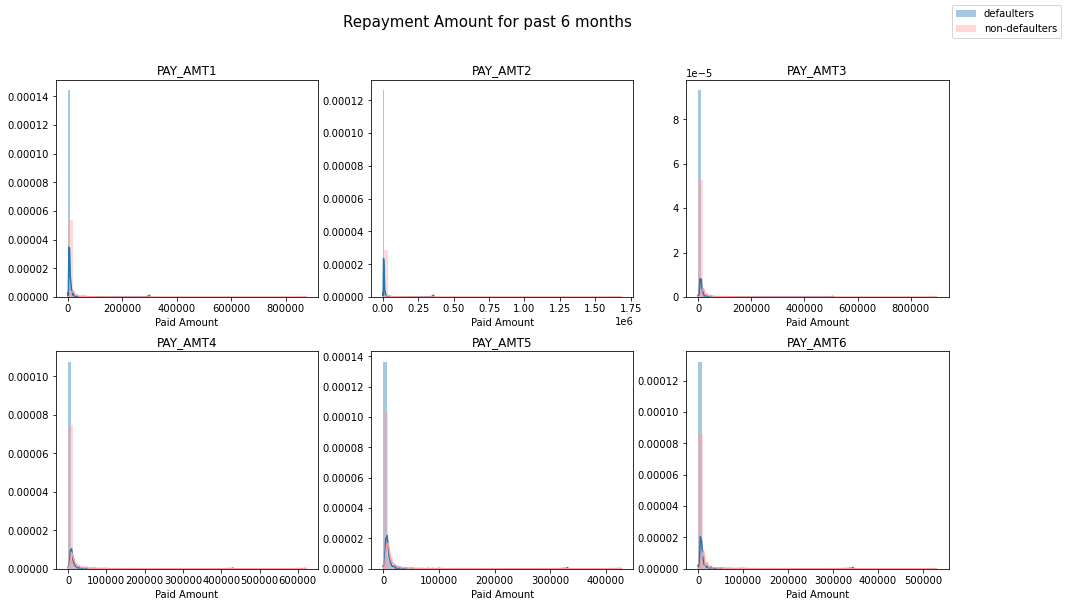

In [34]:
prev_pay_amts = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(16,9))
axs = axs.flatten()
plt.subplots_adjust(hspace=0.25)
plt.suptitle('Repayment Amount for past 6 months',fontsize=15)
for ax,ind in zip(axs,range(len(prev_pay_amts))):
    sns.distplot(a=defaulters[prev_pay_amts[ind]],ax=ax,label = 'defaulters')
    sns.distplot(a=non_default[prev_pay_amts[ind]],ax=ax,color='r',label='non-defaulters')
    ax.set_title(prev_pay_amts[ind])
    ax.set_xlabel('Paid Amount')
line, label = ax.get_legend_handles_labels()
fig.legend(line,label,loc='upper right')

There's not much difference between the amounts paied by defaulters and non-defaulters for the past 6 months except that the # people paying very small amounts is higher in defaulters

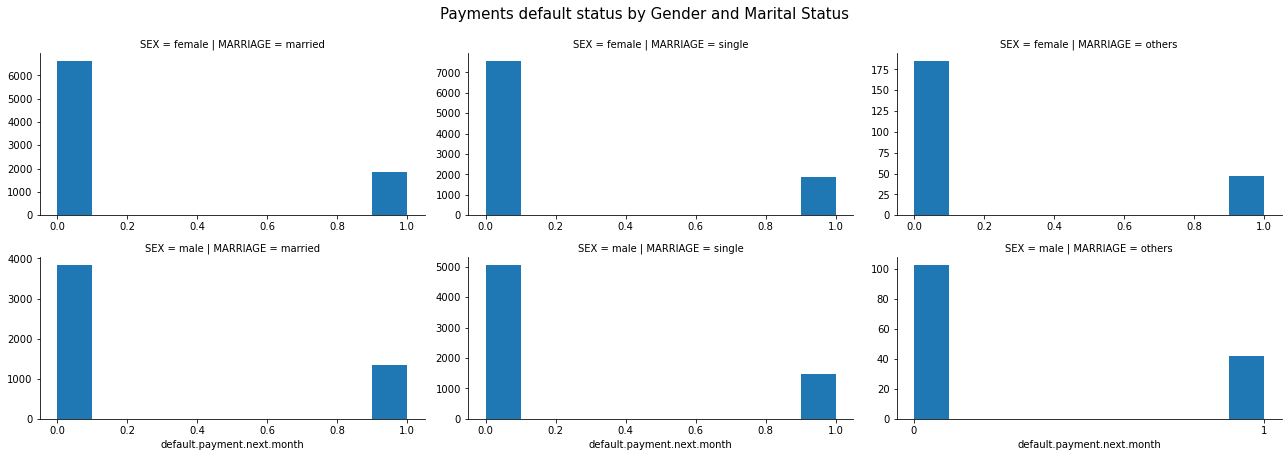

In [35]:
fg = sns.FacetGrid(data_df,col="MARRIAGE",row='SEX',aspect=2,sharey=False,sharex=False)
fg.map(plt.hist,'default.payment.next.month')
plt.xticks([0,1])
fg.fig.suptitle('Payments default status by Gender and Marital Status',fontsize=15,y=1.05)
plt.show()

Looks like there's higher default in males than in females.

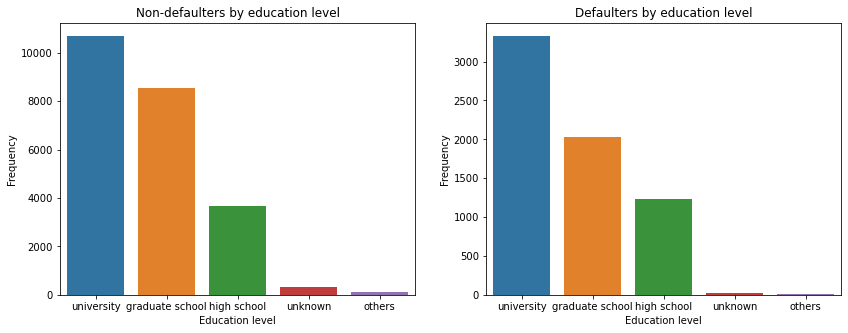

In [36]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(14,5))
vc_1 = pd.value_counts(defaulters['EDUCATION'])
vc_0 = pd.value_counts(non_default['EDUCATION'])
axs = axs.flatten()
sns.barplot(x=vc_0.index,y=vc_0.values,label='Non-defaulters',ax=axs[0])
axs[0].set_title('Non-defaulters by education level')
axs[0].set_xlabel('Education level')
axs[0].set_ylabel('Frequency')
sns.barplot(x=vc_1.index,y=vc_1.values,label='Defaulters',ax=axs[1])
axs[1].set_title('Defaulters by education level')
axs[1].set_xlabel('Education level')
axs[1].set_ylabel('Frequency')
plt.show()

From the above we can believe the in our data, people with higher education hd lesser number of defaults. However, a university level education has highest number in both defaulters and non-defaulters

# Predictive models

In [37]:
target = 'default.payment.next.month'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

Split data in train and validation set
Let's define train and validation sets.

In [38]:
train_df, val_df = train_test_split(data_df_org, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

We also make copies of the train_df and val_df for later usage

In [39]:
train_df_bkp = train_df.copy()
val_df_bkp = val_df.copy()

# Logistic Regression

In [40]:
log_reg = LogisticRegression()
log_reg.fit(train_df[predictors],train_df[target])
pred = log_reg.predict(val_df[predictors])
print('Accuracy: ',metrics.accuracy_score(pred,val_df[target]))
print('ROC_AUC: ',metrics.roc_auc_score(pred,val_df[target]))

Accuracy:  0.7848333333333334
ROC_AUC:  0.892398733122187


c:\users\mohit ranawat\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
params = {'penalty':['l1','l2'],
         'tol':[0.0001,0.001,0.1],
         'C':[0.1,0.3,0.6,1]}

grid = GridSearchCV(estimator=LogisticRegression(solver='liblinear'),param_grid=params,cv=5,scoring='roc_auc')
grid.fit(train_df[predictors],train_df[target])
print(grid.best_score_)
print(grid.best_estimator_)

0.7231737505543705
LogisticRegression(C=0.1, penalty='l1', solver='liblinear', tol=0.001)


The Logistic model is by default considering cut-off probability at 0.5, let's tweak it around a little and check if that affects the overall preformance

In [42]:
best_lr = grid.best_estimator_
pred = best_lr.predict_proba(val_df[predictors])
cutoffs = [0.3,0.4,0.5,0.45,0.6]

In [43]:
pred[0]

array([0.78798551, 0.21201449])

In [44]:
for cutoff in cutoffs:
    new_pred = [1 if i[1] > cutoff else 0 for i in pred]
    print('Cut-off: ',cutoff)
    print('Accuracy: ',metrics.accuracy_score(new_pred,val_df[target]))
    print('ROC_AUC: ',metrics.roc_auc_score(new_pred,val_df[target]))
    print()

Cut-off:  0.3
Accuracy:  0.804
ROC_AUC:  0.7069778851919828

Cut-off:  0.4
Accuracy:  0.8211666666666667
ROC_AUC:  0.7436738514663549

Cut-off:  0.5
Accuracy:  0.8168333333333333
ROC_AUC:  0.7708482084163474

Cut-off:  0.45
Accuracy:  0.8221666666666667
ROC_AUC:  0.7604977693230971

Cut-off:  0.6
Accuracy:  0.7991666666666667
ROC_AUC:  0.7694025707578409



Let's consider tht cutoff 0.45 since it has max performance and make a plot for the area under curve

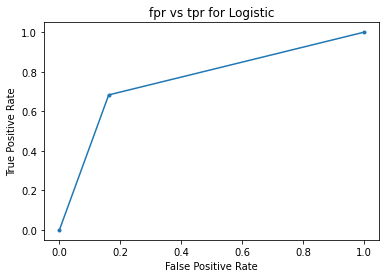

In [45]:
from sklearn.metrics import roc_curve, precision_recall_curve
new_pred = [1 if i[1] > 0.45 else 0 for i in pred]
fpr, tpr, _ = roc_curve(new_pred,val_df[target])
plt.plot(fpr,tpr,marker='.',label='Logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('fpr vs tpr for Logistic')
plt.show()


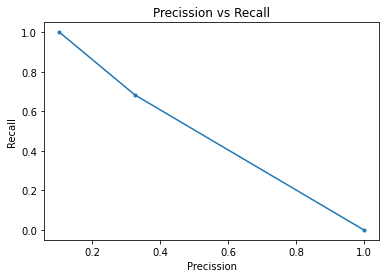

In [46]:
precission, recall, threshold = precision_recall_curve(new_pred,val_df[target])
plt.plot(precission,recall,marker='.',label='Logistic Regression')
plt.xlabel('Precission')
plt.ylabel('Recall')
plt.title('Precission vs Recall')
plt.show()

The precission-recall curve doesn't look so good anyway, let's check the f1 score which comprises of both precission and recall

In [47]:
from sklearn.metrics import f1_score
f1_score(new_pred,val_df[target])

0.44048243314105934

# Randomforest Classifier

In [48]:
rfc = RandomForestClassifier()
rfc.fit(train_df[predictors],train_df[target])
pred = rfc.predict(val_df[predictors])
print('Accuracy: ',metrics.accuracy_score(pred,val_df[target]))
print('ROC_AUC: ',metrics.roc_auc_score(pred,val_df[target]))

Accuracy:  0.8203333333333334
ROC_AUC:  0.7438221156756627


In [49]:
params = {'criterion':['gini','entropy'],
         'min_samples_split':[2,3,5],
         'n_estimators':[30,50,80,100]}
grid = GridSearchCV(RandomForestClassifier(n_jobs=-1),param_grid=params,cv=3,scoring='roc_auc')
grid.fit(train_df[predictors],train_df[target])
print(grid.best_score_)
print(grid.best_estimator_)

0.7690438683104838
RandomForestClassifier(criterion='entropy', min_samples_split=5, n_jobs=-1)


In [50]:
best_rfc = grid.best_estimator_
pred = best_rfc.predict(val_df[predictors])
print('Accuracy: ',metrics.accuracy_score(pred,val_df[target]))
print('ROC_AUC: ',metrics.roc_auc_score(pred,val_df[target]))

Accuracy:  0.8246666666666667
ROC_AUC:  0.7542428450989895


The above is ROC_AUC score for the RandomForestClassifier, how do you think we can proceed next?
Originally our expectation is to improve upon the score our Logistic model was able to get, however the RandomForestClassifier failed to imporve upon it's own score and the Logistic too. So it might be a good idea to not pursue Randomforest anymore. In that light, we shall work with more complex models.

Please note, there isn't a correct answer to the above question. Various solutions could work in different situations, be vary of what you would like to achive and how

# XGboost classifier

In [51]:
xgb.XGBClassifier().get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)>

In [52]:
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(val_df[predictors], val_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = ['binary:logistic']
params['eta'] = [0.039]
params['silent'] = [True]
params['max_depth'] = [2,3,5]
params['subsample'] = [0.8]
params['colsample_bytree'] = [0.9]
params['eval_metric'] = ['auc']
params['random_state'] = [RANDOM_STATE]
params['n_estimators'] = [100,30,50,80]
params['learning_rate'] = [0.001,0.0001,0.1,1,0.3]
params['early_stopping_rounds'] = [EARLY_STOP]
params['importance_type'] = ['gain','lift']

In [54]:
xgb_model = xgb.XGBClassifier()
grid = GridSearchCV(estimator=xgb_model,param_grid=params,cv=3,scoring='roc_auc',verbose=2)
grid.fit(train_df[predictors],train_df[target])
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.001, max_depth=2, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:26:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.001, max_depth=2, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.9s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.001, max_depth=2, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:26:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.001, max_depth=2, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.9s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.001, max_depth=2, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:26:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.001, max_depth=2, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.7s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.001, max_depth=3, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:26:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.0

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.001, max_depth=3, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.9s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.001, max_depth=3, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:26:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.00

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.001, max_depth=5, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.9s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.001, max_depth=5, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:26:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.00

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.0001, max_depth=2, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.0001, max_depth=2, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:26:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.0001, max_depth=3, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.0001, max_depth=3, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:26:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.0001, max_depth=5, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   1.7s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.0001, max_depth=5, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:26:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.0001, max_depth=5, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   1.4s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.1, max_depth=2, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:27:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.1,

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.1, max_depth=2, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.7s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.1, max_depth=2, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:27:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.1, max

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.1, max_depth=3, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.1, max_depth=3, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:27:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.1, max

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.1, max_depth=5, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.1, max_depth=5, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:27:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.1, max

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=1, max_depth=2, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=1, max_depth=2, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:27:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=1, max_depth

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=1, max_depth=3, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   1.2s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=1, max_depth=3, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:27:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=1, max_dep

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=1, max_depth=3, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.9s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=1, max_depth=5, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:27:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=1, max_dept

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=1, max_depth=5, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   1.4s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=1, max_depth=5, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:28:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=1, max_depth

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.3, max_depth=2, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.5s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.3, max_depth=2, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:28:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.3, max

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.3, max_depth=3, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.3, max_depth=3, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:28:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.3, max

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.3, max_depth=5, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.3, max_depth=5, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:28:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=gain, learning_rate=0.3, max

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.001, max_depth=2, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.9s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.001, max_depth=2, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:28:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.001, max_depth=2, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.7s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.001, max_depth=3, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:28:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.0

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.001, max_depth=3, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.9s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.001, max_depth=3, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:28:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.00

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.001, max_depth=5, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.9s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.001, max_depth=5, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:29:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.00

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.0001, max_depth=2, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.0001, max_depth=2, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:29:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.0001, max_depth=3, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.0001, max_depth=3, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:29:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.0001, max_depth=5, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   1.7s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.0001, max_depth=5, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:29:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.0001, max_depth=5, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   1.4s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.1, max_depth=2, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:29:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.1,

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.1, max_depth=2, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.8s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.1, max_depth=2, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:29:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.1, max

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.1, max_depth=3, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.1, max_depth=3, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:29:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.1, max

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.1, max_depth=5, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.1, max_depth=5, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:30:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.1, max

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=1, max_depth=2, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=1, max_depth=2, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:30:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=1, max_depth

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=1, max_depth=3, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   1.2s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=1, max_depth=3, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:30:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=1, max_dep

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=1, max_depth=3, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.9s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=1, max_depth=5, n_estimators=100, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:30:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=1, max_dept

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=1, max_depth=5, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   1.4s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=1, max_depth=5, n_estimators=80, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:30:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=1, max_depth

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.3, max_depth=2, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.5s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.3, max_depth=2, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:30:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.3, max

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.3, max_depth=3, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.3, max_depth=3, n_estimators=50, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:30:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.3, max

[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.3, max_depth=5, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.3, max_depth=5, n_estimators=30, objective=binary:logistic, random_state=2018, silent=True, subsample=0.8 
[17:31:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.9, early_stopping_rounds=50, eta=0.039, eval_metric=auc, importance_type=lift, learning_rate=0.3, max

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  5.1min finished


0.7807294294103292
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=50, eta=0.039, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=2018,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [55]:
best_xgb = grid.best_estimator_
pred = best_xgb.predict(val_df[predictors])
print('Accuracy: ',metrics.accuracy_score(pred,val_df[target]))
print('ROC_AUC: ',metrics.roc_auc_score(pred,val_df[target]))

Accuracy:  0.8293333333333334
ROC_AUC:  0.7684682765781836


# Plot variable importance

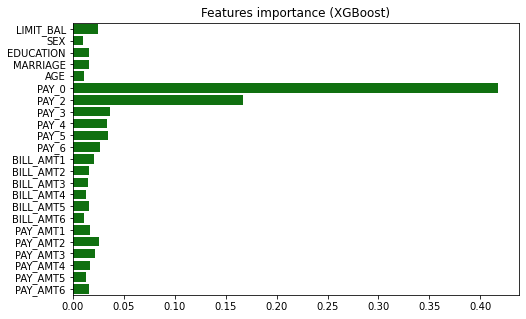

In [56]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
plt.title("Features importance (XGBoost)")
sns.barplot(x=best_xgb.feature_importances_,y=val_df.columns.drop([target,'ID']), ax=ax, color="green") 
plt.show()

How good is the XGboost model in terms of real life situation?
We can say it performs decently because the variables with utmost importance from our model are actually the ones that affect a payment's default

# LightGBM

In [57]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':50, # because training data is sightly unbalanced 
         }

In [58]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

We will also initialize the Datasets with the list of the categorical features (lgb has a special treatment for categorical values).

In [59]:
dtrain = lgb.Dataset(train_df[predictors].values, 
                     label=train_df[target].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

dvalid = lgb.Dataset(val_df[predictors].values,
                     label=val_df[target].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

In [60]:
evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

del dvalid
gc.collect()

c:\users\mohit ranawat\appdata\local\programs\python\python38\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005311 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.778238	valid's auc: 0.771173

c:\users\mohit ranawat\appdata\local\programs\python\python38\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
c:\users\mohit ranawat\appdata\local\programs\python\python38\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))



[100]	train's auc: 0.789346	valid's auc: 0.782605
[150]	train's auc: 0.794861	valid's auc: 0.784753
Early stopping, best iteration is:
[135]	train's auc: 0.793452	valid's auc: 0.785154


19421

Best validation score was obtained for round 187, for which AUC ~= 0.78.
Let's plot variable importance

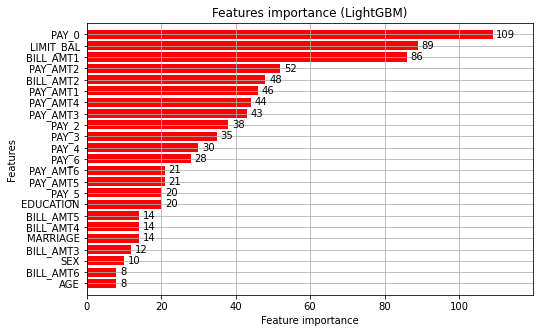

In [61]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red") 
plt.show()

Training and validation using cross-validation
Let's use now cross-validation. We will use cross-validation (KFolds) with 5 folds. Data is divided in 5 folds and, by rotation, we are training using 4 folds (n-1) and validate using the 5th (nth) fold.

The average validation AUC for the 5 folds obtained was 0.78, with values between 0.778 and 0.79.

# Conclusions
We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features.

We started with RandomForrestClassifier, for which we obtained an AUC scode of 0.66. For the RandomForrestClassifier we also experimented with OneHotEncoder, replacing the categorical features with dummified values (introducing one dummy variable for each category). The AUC score did not improved significantly in this case.
Next we used an AdaBoostClassifier model, with lower AUC score (0.65).
We followed with an CatBoostClassifier model, with lower AUC score (0.66).
Then we experimented with a XGBoost model, for which the AUC score obtained was 0.77.

We then presented the data to a LightGBM model. We used both train-validation split and cross-validation to evaluate the model effectiveness to predict the target value, i.e. detecting if a credit card client will default next month. With both methods for LightGBM the obtained values of AUC for the validation set were around 0.78.